In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("delivery_time.csv", )
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [157]:
df.columns = [['Delivery_Time','Sorting_Time']]
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [43]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [44]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


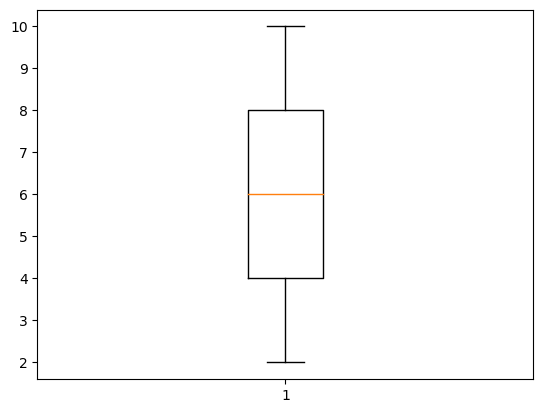

In [45]:
plt.boxplot(df.Sorting_Time)
plt.show()

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

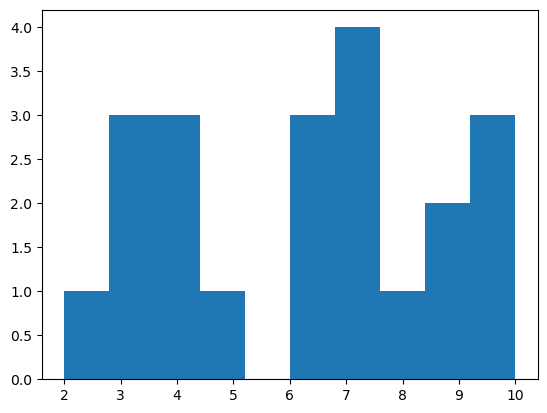

In [64]:
plt.hist(df["Sorting_Time"])

<AxesSubplot:ylabel='Density'>

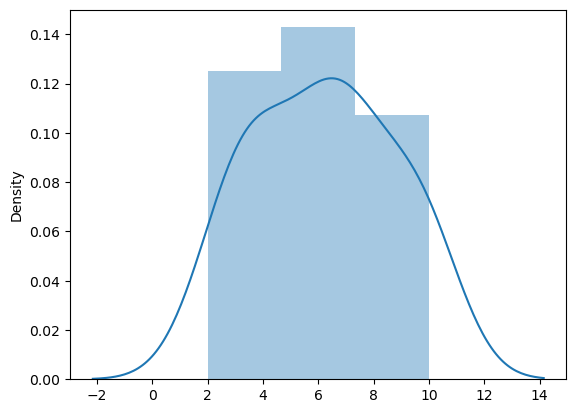

In [58]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Sorting_Time'])

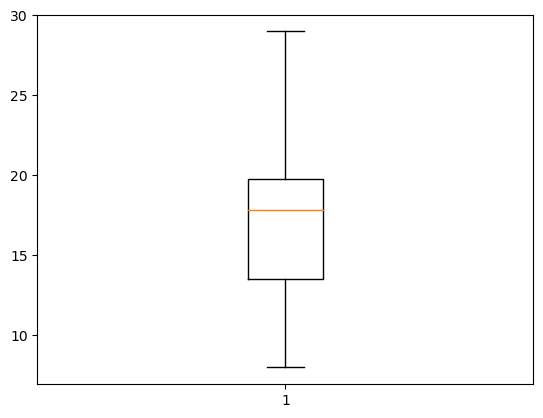

In [66]:
plt.boxplot(df.Delivery_Time)
plt.show()

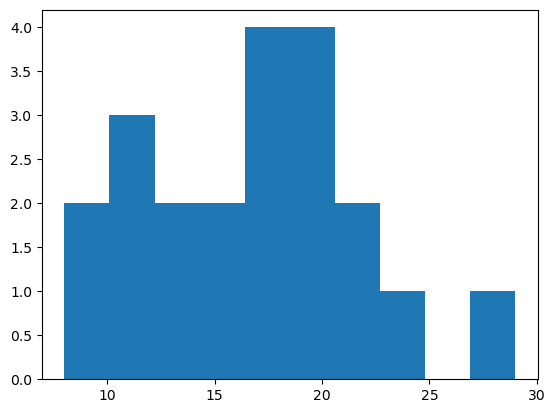

In [67]:
plt.hist(df.Delivery_Time)
plt.show()

<AxesSubplot:ylabel='Density'>

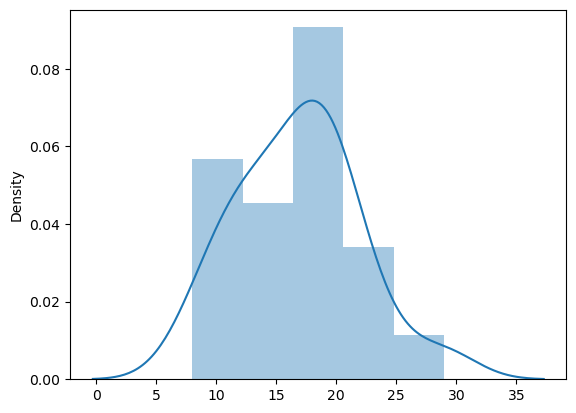

In [68]:
sns.distplot(df.Delivery_Time)

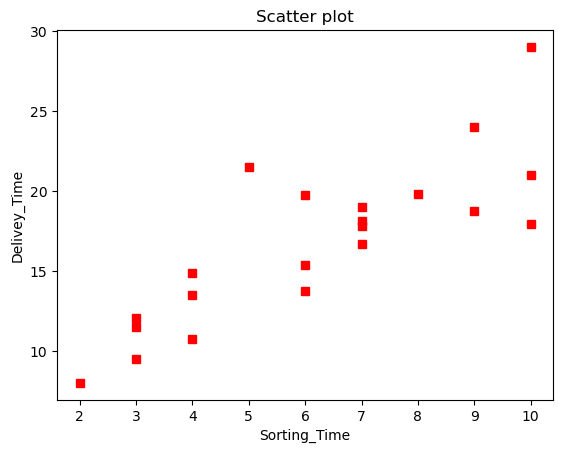

In [83]:
plt.plot(df.Sorting_Time, df.Delivery_Time,"rs")
plt.xlabel("Sorting_Time")
plt.ylabel("Delivey_Time")
plt.title("Scatter plot")
plt.show()

In [84]:
  import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df).fit()

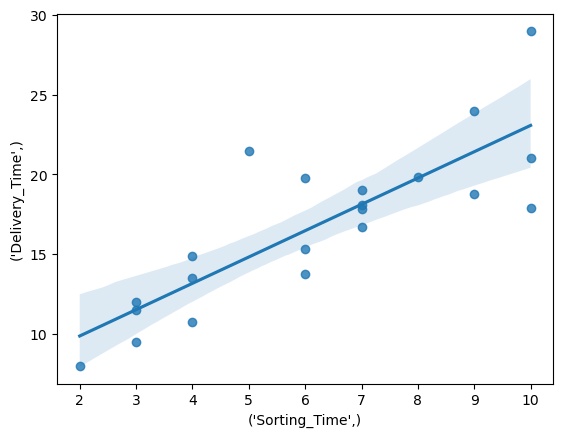

In [85]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=df);

In [86]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           3.98e-06
Time:                        15:49:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
print(model.tvalues, '\n', model.pvalues)  

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [109]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [90]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [93]:
pred = model.predict(df.Sorting_Time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [110]:
rmse_lin = np.sqrt(np.mean((np.array(df["Delivery_Time"])-np.array(pred))**2))
rmse_lin

6.423636484498172

Text(0, 0.5, 'Delivery_Time')

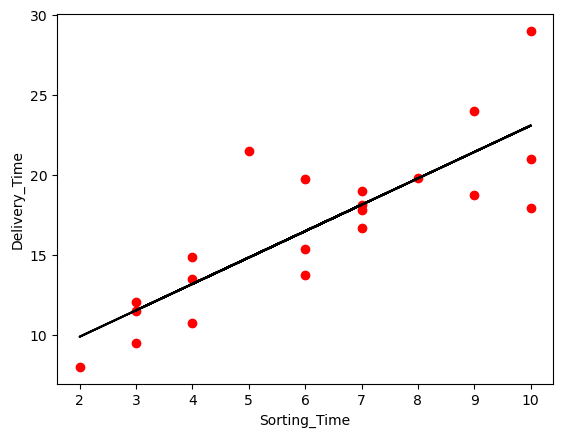

In [112]:
plt.scatter(x = df['Sorting_Time'], y = df['Delivery_Time'], color = "red" )
plt.plot(df['Sorting_Time'], pred, color = 'black')
plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")


In [156]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Transformations


In [164]:
model2 = smf.ols("Delivery_Time~np.log(Sorting_Time)", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.64e-06
Time:                        16:52:01   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [166]:
pred_log = model2.predict(df['Sorting_Time'])
pred_log

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [187]:
rmse_log = np.sqrt(np.mean((np.array(df["Delivery_Time"])-np.array(pred_log))**2))
rmse_log

6.44873560573014

Text(0, 0.5, 'Delivery_Time')

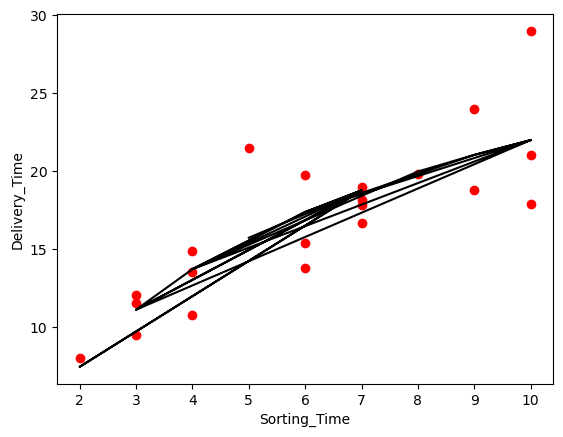

In [168]:
plt.scatter(x = df['Sorting_Time'], y = df['Delivery_Time'], color = 'red')
plt.plot(df['Sorting_Time'],pred_log,color = 'black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

In [169]:
model3 = smf.ols("Delivery_Time ~ np.sqrt(Sorting_Time)",data  = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.61e-06
Time:                        16:55:05   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sorting_Time)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [170]:
model3.resid

0    -1.578867
1     0.145655
2     2.828239
3     2.709064
4     6.421133
5    -1.571761
6     0.520591
7    -1.727742
8    -4.678867
9    -2.540936
10   -0.099232
11   -2.604345
12   -1.799409
13    0.272258
14    0.802258
15    1.525655
16   -3.171761
17   -0.369409
18   -0.705198
19   -0.649409
20    6.272080
dtype: float64

In [172]:
model3.rsquared

0.695806227630867

In [173]:
y_pred_sqrt = model3.predict(df['Sorting_Time'])
y_pred_sqrt

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [179]:
rmse_sqrt = np.sqrt(np.mean((np.array(df['Delivery_Time'])-np.array(y_pred_sqrt))**2))
rmse_sqrt

6.449425472471538

In [180]:
df["Sorting_time_Square"]  = df["Sorting_Time"] * df["Sorting_Time"]
df

,Delivery_Time,Sorting_Time,Sorting_time_Square
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [181]:
model4 = smf.ols("np.log(Delivery_Time)~Sorting_Time+Sorting_time_Square",data = df).fit()
model4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.765
Model:                               OLS   Adj. R-squared:                  0.739
Method:                    Least Squares   F-statistic:                     29.28
Date:                   Thu, 03 Aug 2023   Prob (F-statistic):           2.20e-06
Time:                           17:02:01   Log-Likelihood:                 9.9597
No. Observations:                     21   AIC:                            -13.92
Df Residuals:                         18   BIC:                            -10.79
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.6997      0.228      7.441      0.000       1.220       2.180
Sorting_Time            0.2659      0.080      3.315      0.004       0.097       0.434
Sorting_time_Square    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
pred_trans = model4.predict(df)
pred_tran = np.exp(pred_trans)
pred_tran

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [183]:
model4.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [184]:
model4.rsquared

0.7648666342953729

In [185]:
rmse_4 = np.sqrt(np.mean((np.array(df["Delivery_Time"])-np.array(pred_tran))**2))
rmse_4

6.435868588064229

Text(0, 0.5, 'Delivery_Time')

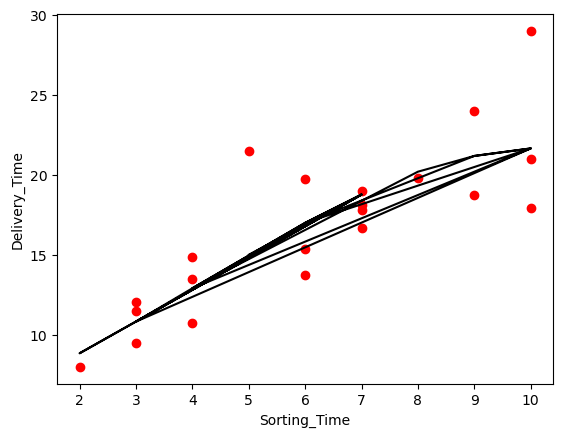

In [186]:
plt.scatter(x = df['Sorting_Time'], y = df['Delivery_Time'], color = 'red')
plt.plot(df['Sorting_Time'],pred_tran,color = 'black')
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')

Text(0, 0.5, 'standardized Residual')

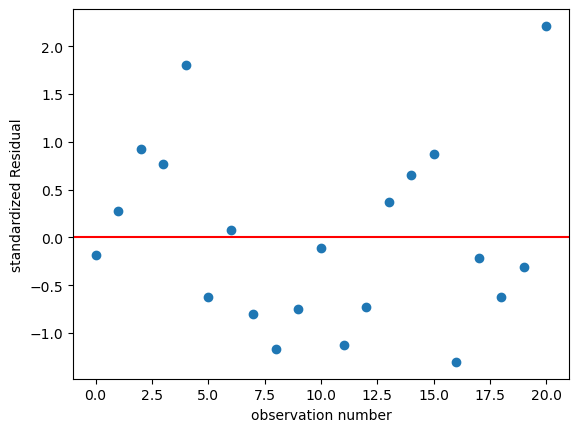

In [192]:
plt.scatter(np.arange(21), model4.resid_pearson)
# resid_pearson gives the standradized values for the errors
# means all the errors going to convert it Z-scores
plt.axhline(y=0, color= 'red')
plt.xlabel("observation number")
plt.ylabel("standardized Residual")

In [190]:
df1 = {"Model" : pd.Series(['rmse_lin','rmse_log','rmse_sqrt','rmse_4']),
       "RMSE_Values" : pd.Series([rmse_lin,rmse_log,rmse_sqrt,rmse_4]),
      "R_Squared" : pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table = pd.DataFrame(df1)
table

,Model,RMSE_Values,R_Squared
0,rmse_lin,6.435869,0.682271
1,rmse_log,6.448736,0.695443
2,rmse_sqrt,6.449425,0.695806
3,rmse_4,6.435869,0.764867


In [191]:
#As we can see that the final model is the best model


# Predict for a new data point

In [201]:
new_data = {"Sorting_Time" :pd.Series([4,8,10]),
            "Sorting_time_Square":pd.Series([16,64,100])}
df4 = pd.DataFrame(new_data)
y = model4.predict(df4)
pred = np.exp(y)
pred

0    12.909227
1    20.191891
2    21.646921
dtype: float64